### 0. Importing modules and data

In [49]:
import pandas as pd
import os
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

raw_df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', delimiter=';')
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1. Objective
Whether the customer takes out a long-term deposit or not. Target: 'y'

### 2.Exploration and superficial cleaning
#### 2.1 Problem dimensions

In [50]:
raw_df.shape

(41188, 21)

Our dataset have 41188 rows and 21 columns, so we have 21 features

#### 2.2 Null values

In [51]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no null values in any column.

In [52]:
# copy raw_df and modify the copy, leaving the original dataframe unmodified
df = raw_df.copy()

#### 2.3 Duplicates

As we don't have any row identifiers, we cannot detect duplicates.

#### 2.5 Drop unuseful information

In [53]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [54]:
Nrows_nonexistent = (df['poutcome'] == 'nonexistent').sum()
Nrows_nonexistent

35563

Since most of the entries did not exist in the previous campaign, this column does not provide information, so it can be removed

In [55]:
df.drop(["poutcome", "pdays", "education"], axis = 1, inplace = True)
df.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no


### 3. Univariate analysis

<Axes: xlabel='day_of_week', ylabel='Count'>

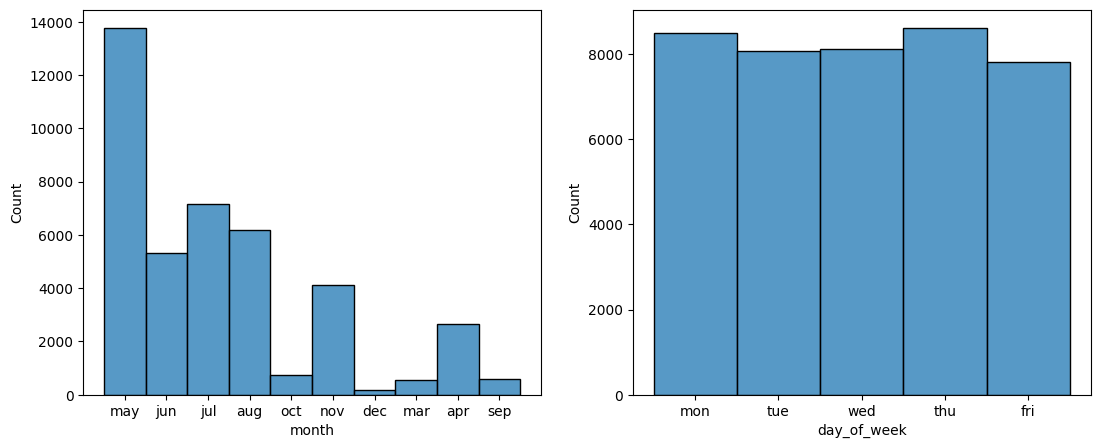

In [56]:
fig, axis = plt.subplots(1, 2, figsize=(13, 5))

sns.histplot(df, x="month", ax=axis[0])
sns.histplot(df, x="day_of_week", ax=axis[1])

The majority of contacts are made in the month of May, and contacts are equally distributed across any weekday.

### 4. Multivariate analysis

<Axes: xlabel='y', ylabel='count'>

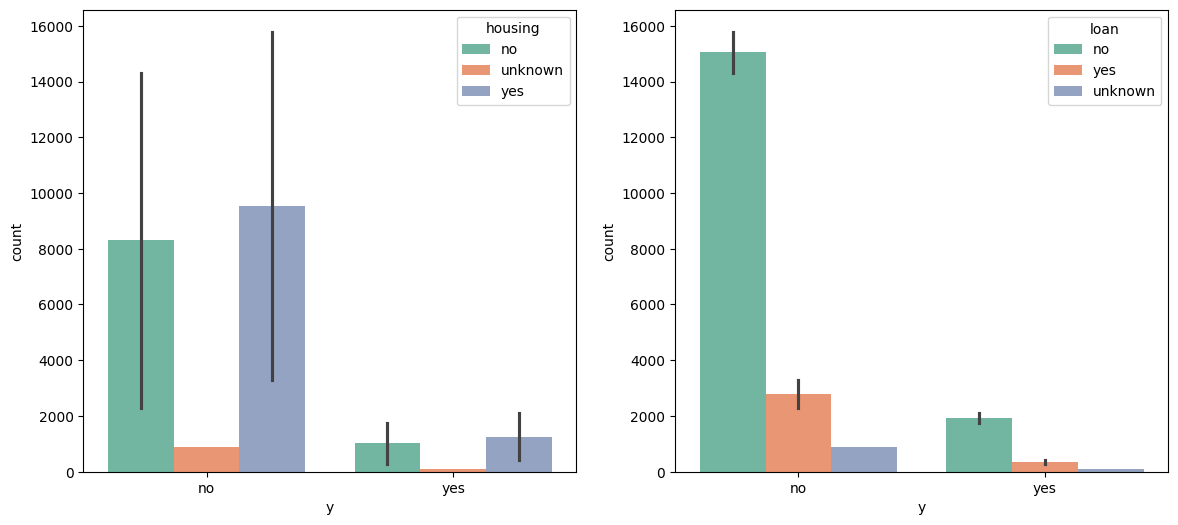

In [57]:
agg_df = df.groupby(['y', 'housing', 'loan']).size().reset_index(name='count')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='y', y='count', hue='housing', data=agg_df, palette='Set2',ax=axes[0],)
sns.barplot(x='y', y='count', hue='loan', data=agg_df, palette='Set2',ax=axes[1])

The majority of people who already have a mortgage or personal loan do not purchase the product

In [58]:
# Copy df to factorize categorics variables in a new dataframe
corr_df = df.copy()
corr_df.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,may,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,unknown,no,no,telephone,may,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,no,yes,no,telephone,may,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,no,no,no,telephone,may,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,no,no,yes,telephone,may,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: >

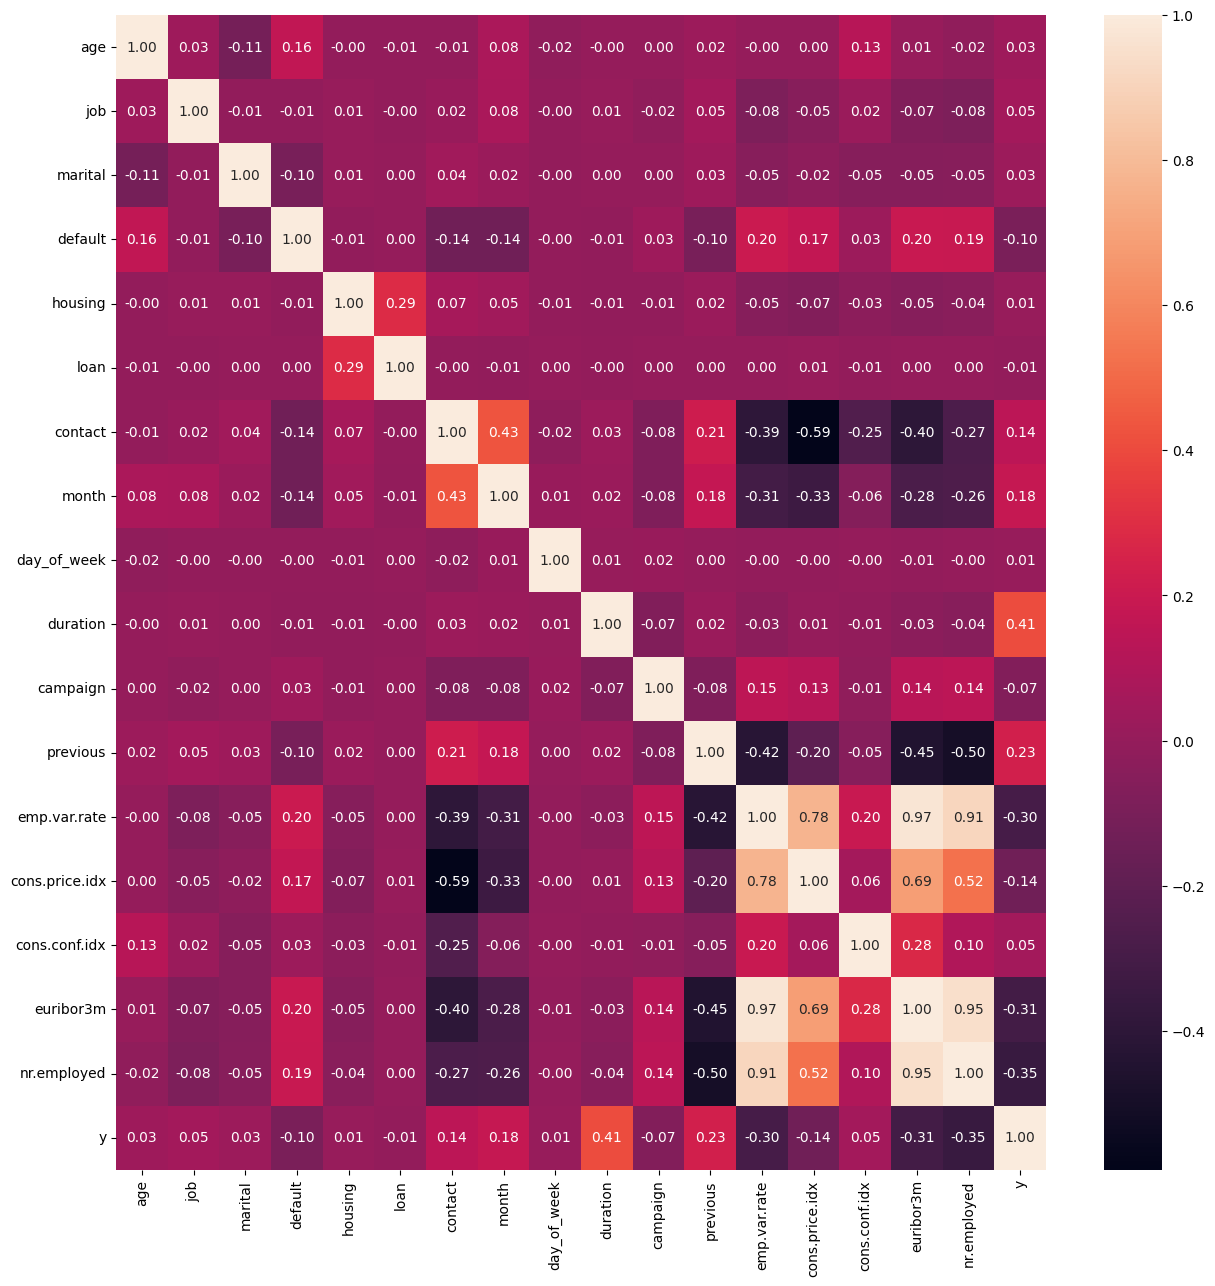

In [59]:
corr_df["job"] = pd.factorize(corr_df["job"])[0]
corr_df["marital"] = pd.factorize(corr_df["marital"])[0]
corr_df["default"] = pd.factorize(corr_df["default"])[0]
corr_df["housing"] = pd.factorize(corr_df["housing"])[0]
corr_df["loan"] = pd.factorize(corr_df["loan"])[0]
corr_df["contact"] = pd.factorize(corr_df["contact"])[0]
corr_df["month"] = pd.factorize(corr_df["month"])[0]
corr_df["day_of_week"] = pd.factorize(corr_df["day_of_week"])[0]
corr_df["y"] = pd.factorize(corr_df["y"])[0]

fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(corr_df.corr(), annot = True, fmt = ".2f")


About 10 variables seems to be relevant.

Save precleaned data:
- AllData_precleaned: with outliers and factorized

In [60]:
corr_df.to_csv('../data/processed/bank-marketing_AllData_precleaned.csv', index=False)

### 5. Feature engineering
#### 5.1 Outliers

In [61]:
corr_df.describe()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.673691,0.510634,0.208872,0.571914,0.199767,0.634748,2.250097,1.979581,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.454116,0.696779,0.406686,0.541209,0.456002,0.481507,2.429079,1.411514,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


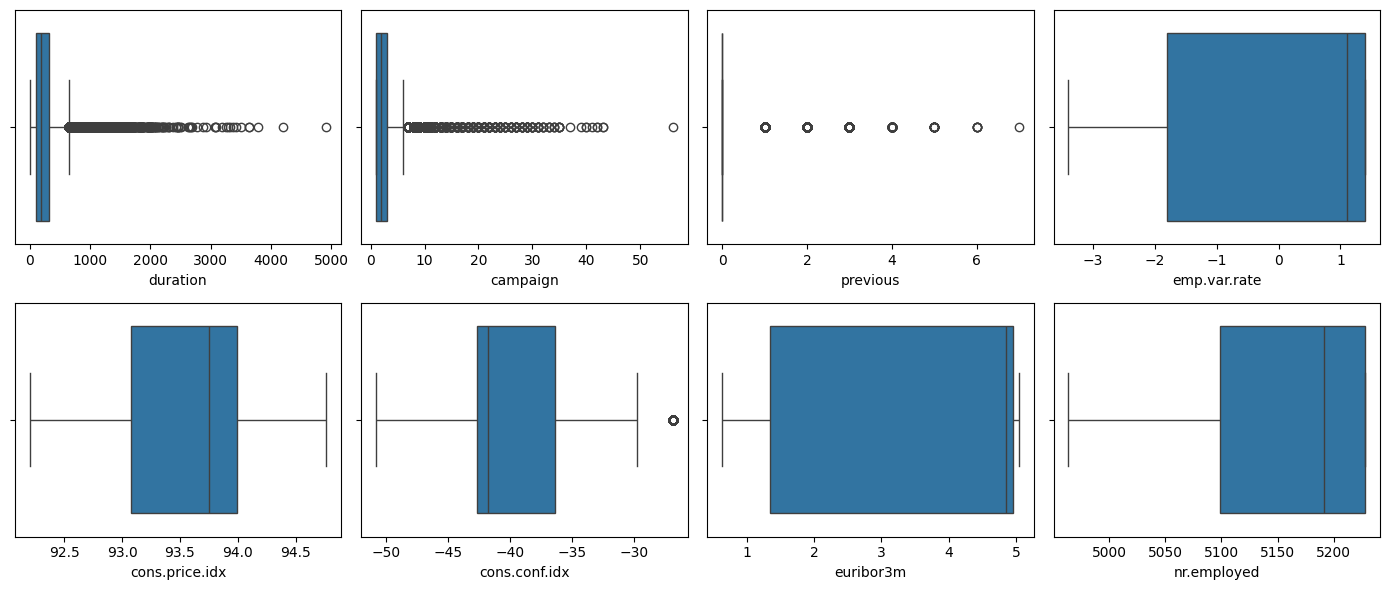

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(14, 6))

sns.boxplot(x=corr_df['duration'], ax=axes[0, 0])
sns.boxplot(x=corr_df['campaign'], ax=axes[0, 1])
sns.boxplot(x=corr_df['previous'], ax=axes[0, 2])
sns.boxplot(x=corr_df['emp.var.rate'], ax=axes[0, 3])
sns.boxplot(x=corr_df['cons.price.idx'], ax=axes[1, 0])
sns.boxplot(x=corr_df['cons.conf.idx'], ax=axes[1, 1])
sns.boxplot(x=corr_df['euribor3m'], ax=axes[1, 2])
sns.boxplot(x=corr_df['nr.employed'], ax=axes[1, 3])

plt.tight_layout()


We found outliers in cons.conf.idx that i can be replace by mode

In [63]:
descr = corr_df["cons.conf.idx"].describe()
descr

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [64]:
minN_iqr = descr["75%"] - descr["25%"]
upper_l = descr["75%"] + 1.5*minN_iqr
lower_l = descr["25%"] - 1.5*minN_iqr

print(lower_l, upper_l)
outliers = corr_df[corr_df['cons.conf.idx'] >= upper_l]
outliers.to_csv('../data/processed/bank-marketing_Outliers.csv', index=False)
outliers

-52.150000000000006 -26.949999999999992


,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38154,50,6,0,0,1,0,1,4,3,305,2,1,-3.4,92.431,-26.9,0.754,5017.5,1
38155,37,2,1,0,1,0,1,4,3,447,3,0,-3.4,92.431,-26.9,0.754,5017.5,1
38156,59,4,1,0,0,0,1,4,3,86,1,2,-3.4,92.431,-26.9,0.754,5017.5,0
38157,31,2,0,0,1,0,1,4,3,760,1,0,-3.4,92.431,-26.9,0.754,5017.5,0
38158,35,2,0,0,1,0,1,4,3,194,1,1,-3.4,92.431,-26.9,0.754,5017.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38596,69,5,0,0,1,1,1,4,4,257,3,0,-3.4,92.431,-26.9,0.720,5017.5,1
38597,18,11,1,0,0,1,1,4,4,368,2,0,-3.4,92.431,-26.9,0.720,5017.5,1
38598,59,5,2,0,1,0,0,4,4,152,4,0,-3.4,92.431,-26.9,0.720,5017.5,0
38599,37,2,1,0,0,0,1,4,4,416,2,0,-3.4,92.431,-26.9,0.720,5017.5,1


In [65]:
clean_df = corr_df.copy()

In [66]:
mode = clean_df['cons.conf.idx'].mode()

replace_func = lambda x: x if lower_l <= x <= upper_l else mode

clean_df = corr_df.copy()
clean_df['cons.conf.idx'] = clean_df['cons.conf.idx'].apply(replace_func)

Save all dataframes as csv:
- Cleaned_factorice: without outliers and factorized

In [67]:
clean_df.to_csv('../data/processed/bank-marketing_Cleaned-consconfidx.csv', index=False)


#### 5.3 Feature scaling
First, we divide the data

In [68]:
corr_df.columns

Index(['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [69]:
predictors = ['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']
target = 'y'

AllX = corr_df[predictors]
AllY = corr_df[target]

AllData_X_train, AllData_X_test, AllData_y_train, AllData_y_test = train_test_split(AllX, AllY, test_size = 0.3, random_state = 42)

AllData_X_train.to_csv('../data/processed/bank-marketing_AllData_Xtrain.csv', index=False)
AllData_X_test.to_csv('../data/processed/bank-marketing_AllData_Xtest.csv', index=False)
AllData_y_train.to_csv('../data/processed/bank-marketing_AllData_ytrain.csv', index=False)
AllData_y_test.to_csv('../data/processed/bank-marketing_AllData_ytest.csv', index=False)

X = clean_df[predictors]
Y = clean_df[target]

Clean_X_train, Clean_X_test, Clean_y_train, Clean_y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

Clean_X_train.to_csv('../data/processed/bank-marketing_Cleaned-consconfidx_Xtrain.csv', index=False)
Clean_X_test.to_csv('../data/processed/bank-marketing_Cleaned-consconfidx_Xtest.csv', index=False)
Clean_y_train.to_csv('../data/processed/bank-marketing_Cleaned-consconfidx_ytrain.csv', index=False)
Clean_y_test.to_csv('../data/processed/bank-marketing_Cleaned-consconfidx_ytest.csv', index=False)

#### 5.4 Normalize

In [70]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

scaler = StandardScaler()
scaler.fit(AllData_X_train)

AllData_X_train_norm = scaler.transform(AllData_X_train)
AllData_X_train_norm = pd.DataFrame(AllData_X_train_norm, index = AllData_X_train.index, columns = predictors)
AllData_X_train_norm.to_csv('../data/processed/bank-marketing_AllData_Xtrain_norm.csv', index=False)

scaler.fit(AllData_X_test)

AllData_X_test_norm = scaler.transform(AllData_X_test)
AllData_X_test_norm = pd.DataFrame(AllData_X_test, index = AllData_X_test.index, columns = predictors)
AllData_X_test_norm.to_csv('../data/processed/bank-marketing_AllData_Xtest_norm.csv', index=False)

dump(scaler, open("../data/processed/normalizer.sav", "wb"))
AllData_X_train_norm.head()

,age,job,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,-1.053709,-0.676665,-0.737196,-0.511562,-1.056690,-0.4394,0.756382,1.543705,-1.407216,-0.695116,0.154139,1.673800,-1.962634,-1.490923,1.621455,-1.678565,-1.978346
34855,-1.053709,0.136292,0.699960,-0.511562,-1.056690,-0.4394,-1.322083,-0.931494,1.428361,-0.944916,0.517478,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182
7107,0.477399,-0.270187,-0.737196,1.953150,0.787018,-0.4394,-1.322083,-0.931494,0.719467,0.073498,-0.209199,-0.349144,0.647250,0.718902,0.887871,0.713705,0.330682
31614,-0.575238,-1.083144,-0.737196,-0.511562,-1.056690,-0.4394,0.756382,-0.931494,0.719467,-0.722018,-0.572537,1.673800,-1.198766,-1.180409,-1.226575,-1.322404,-0.936182
34878,-0.766626,-0.676665,0.699960,-0.511562,-1.056690,-0.4394,0.756382,-0.931494,1.428361,3.547637,2.334170,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182


In [71]:
scaler.fit(Clean_X_train)

Clean_X_train_norm = scaler.transform(Clean_X_train)
Clean_X_train_norm = pd.DataFrame(Clean_X_train_norm, index = Clean_X_train.index, columns = predictors)
Clean_X_train_norm.to_csv('../data/processed/bank-marketing_Cleaned-consconfidx_Xtrain_norm.csv', index=False)

Clean_X_test_norm = scaler.transform(Clean_X_test)
Clean_X_test_norm = pd.DataFrame(Clean_X_test_norm, index = Clean_X_test.index, columns = predictors)
Clean_X_test_norm.to_csv('../data/processed/bank-marketing_Cleaned-consconfidx_Xtest_norm.csv', index=False)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/_array_api.py:521: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  array = numpy.asarray(array, order=order, dtype=dtype)


### 6.Feature selection

In [72]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif # mutual_info is used because there are strongly related variables and target is categorical
selection_model = SelectKBest(mutual_info_classif, k = 10)
selection_model.fit(AllData_X_train_norm, AllData_y_train)
ix = selection_model.get_support()
AllData_X_train_sel = pd.DataFrame(selection_model.transform(AllData_X_train_norm), columns = AllData_X_train_norm.columns.values[ix])
AllData_X_train_sel.to_csv('../data/processed/bank-marketing-campaign_AllData_Xtrain_norm_featureSel.csv', index=False)

selection_model.fit(Clean_X_train_norm, Clean_y_train)
Clean_X_train_sel = pd.DataFrame(selection_model.transform(Clean_X_train_norm), columns = Clean_X_train_norm.columns.values[ix])
Clean_X_train_sel.to_csv('../data/processed/bank-marketing-campaign_Cleaned-consconfidx_Xtrain_norm_featureSel.csv', index=False)

dump(selection_model, open("../data/processed/selection_model.sav", "wb"))


AllData_X_train_sel.head()

,age,contact,month,duration,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-1.053709,0.756382,1.543705,-0.695116,1.673800,-1.962634,-1.490923,1.621455,-1.678565,-1.978346
1,-1.053709,-1.322083,-0.931494,-0.944916,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182
2,0.477399,-1.322083,-0.931494,0.073498,-0.349144,0.647250,0.718902,0.887871,0.713705,0.330682
3,-0.575238,0.756382,-0.931494,-0.722018,1.673800,-1.198766,-1.180409,-1.226575,-1.322404,-0.936182
4,-0.766626,0.756382,-0.931494,3.547637,-0.349144,-1.198766,-1.180409,-1.226575,-1.366780,-0.936182


### 7. Logistic Regression
First we train the model with clean data with feature selection

In [73]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Clean_X_train_sel, Clean_y_train)
Clean_y_train_pred = model.predict(Clean_X_train_sel)
print(Clean_y_train_pred)

[0 0 0 ... 0 0 0]


In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(Clean_y_train, Clean_y_train_pred)

0.9048593527799937

90% it's fine. Let's do the same with all data sample, with outliers, and with feature selection

In [75]:
model.fit(AllData_X_train_sel, AllData_y_train)
AllData_y_train_pred = model.predict(AllData_X_train_sel)
first_acc = accuracy_score(AllData_y_train, AllData_y_train_pred)
print(first_acc)

0.9055877354236759


Accuracy is a little better with outliers. We are going to continue with this sample and trying to optimize hyperparameters.

#### 7.1 Optimize hyperparameters

In [76]:
from sklearn.model_selection import GridSearchCV
hyperp_dict = {
    "penalty": [None, 'l2', 'l1', 'elasticnet'],
    'C': [0.5,1,5,10,20],
    "dual": [True, False],
    "fit_intercept": [True, False],
    "max_iter": [5, 15, 50, 100],
    'class_weight': [None,'balanced']
}
grid = GridSearchCV(model, hyperp_dict, scoring = "accuracy", cv = 10)
grid.fit(AllData_X_train_sel, AllData_y_train)
grid.best_params_

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs fa

{'C': 20,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 15,
 'penalty': 'l2'}

In [77]:
New_y_train_pred = grid.best_estimator_.predict(AllData_X_train_sel)
new_acc = accuracy_score(AllData_y_train, New_y_train_pred)
print(new_acc)
if first_acc >= new_acc:
    print('The model has not improved')
else:
    print('The model has improved by {:.2e}%. Now the accuracy is {:.2f}%'.format((first_acc - new_acc) * 100, new_acc * 100))


0.9054836807602927
The model has not improved


In [78]:
dump(grid.best_estimator_, open("../data/processed/log_regression.sav", "wb"))